## Lecture et écriture dans un fichier

Les fichiers considérés ici sont des fichiers dont le contenu est constitué uniquement de texte (lettres, chiffres, caractères de ponctuation, ayant une représentation de type `str` en Python), structurés uniquement par des passages à la ligne.  
Il s'agit usuellement des fichiers d'extension `.txt` et `.csv`.  

La lecture de ces fichiers ne requiert que la connaissance de la table d'encodage des caractères utilisée.  
Les encodages usuels sont par exemple décrits <a href="https://www.alsacreations.com/astuce/lire/83-codages-ascii-latin1-etc.html">ici</a>.  
Pour connnaître l'encodage d'un fichier texte déjà créé, on peut examiner les propriétés du fichier ou l'ouvrir avec l'application <a href="https://notepad-plus-plus.org/downloads/">Notepad++</a>.  
L'encodage spécifique à un fichier pourra être indiqué à Python au travers de l'argument `encoding`.  
Par défaut Python utilise l'encodage par défaut défini par l'OS de la machine sur laquelle on exécute le programme.

Notons que les fichiers d'extension `.py`, `.html` répondent également aux spécifications ci-dessus (ce sont des fichiers de texte) et peuvent être ouverts, écrits, modifiés, avec les méthodes décrites ici. En revanche, ce n'est pas le cas des fichiers `.odt`, `.doc`, *etc.*, créés à l'aide d'applications de traitement de texte, ou `.calc`, `.xls`, *etc.*, créés à l'aide de tableurs, et qui contiennent des informations complexes de mise en forme, ou des formules, ..., dont l'encodage binaire suit des règles propres, définies par l'application avec laquelle ils ont été créés.   
Les régles de cet encodage peuvent être &laquo; *libres* &raquo; (publiées et consultables) ou &laquo; *propriétaires* &raquo; (non divulguées et protégées par des droits).

* Préliminaire : chargement des fichiers-exemples

In [12]:
import os

def ensure_path_validity(path_to_dst):
    head, tail = os.path.split(path_to_dst)
    #print('head =', head, 'tail =', tail)
    if head != '' and not os.path.exists(head):
        #print(head, head == '')
        ensure_path_validity(head)
    if head == '':
        head = '.'
    if tail != '' and tail not in os.listdir(head) or not os.path.isdir(path_to_dst):
        os.mkdir(path_to_dst)

def download_file_as_is(src_url, dst_dir, filename):
    from urllib.request import urlopen
    f = urlopen(src_url)
    if dst_dir != '.':
        ensure_path_validity(dst_dir)
    with open(os.path.join(dst_dir, filename), 'wb') as f1:
        f1.write(f.read())

distant_directory_url = "https://raw.githubusercontent.com/lbaille20/Info2A/main/PSI-TD08%202020-21/"
fichiers_a_telecharger = [
    "Info2A-PSI_TD07_LectureEcritureFichier%202020-21_v0.docx",
    "Correspondances.txt",
    "Notre-Dame%20de%20Paris.txt",
    "coordonnees.csv",
    "Titrage.txt",
    "graphe1_listesadjacence.csv",
    "graphe2_listesadjacence.csv"]

cpt = 0
for filename in fichiers_a_telecharger:
    src_url = '/'.join([distant_directory_url, filename])
    dst_dir = "Telechargements/TD08"
    try:
        download_file_as_is(src_url, dst_dir, filename)
        cpt += 1
    except:
        print(filename, ': échec.')
print(cpt, 'téléchargement(s) réussi(s).')

7 téléchargement(s) réussi(s).


### I) Lecture et écriture dans un fichier texte (.txt, .csv)

#### I.1. Lecture dans un fichier texte

La lecture dans un fichier se déroule en trois étapes :  
1. ouverture du fichier  ;
2. lecture du contenu du fichier ;  
3. fermeture du fichier.

L'ouverture du fichier se fait par appel à la fonction `open()`, qui crée un *objet fichier* interfaçant l'accès au fichier, et la fermeture par appel à la méthode `close()` sur cet objet-fichier.  

**exécuter la cellule suivante pour télécharger les fichiers**

La lecture proprement dite, permettant de récupérer le contenu du fichier sous la forme d'une ou plusieurs chaînes de caractères (type `str`), se fait, au choix, à l'aide des trois méthodes `.read()`, `.readlines()` ou `.readline()`.  

In [2]:
import os

In [3]:
os.listdir()

['Info2A-PSI_Traitement_Images_TD06_20200801.ipynb',
 'Telechargements',
 'psi_annexes-2020-21_info1a_lecture-et-ecriture-dans-un-fichier_v0.ipynb',
 'IPT_PSI-TD06 2019-2020_CR_v7.ipynb',
 'Info2A_annexes-2020-21_lecture-et-ecriture-dans-un-fichier_v1.ipynb',
 'Untitled.ipynb',
 '.ipynb_checkpoints']

In [13]:
f = open("Telechargements/TD08/Correspondances.txt", encoding="cp1252")

In [5]:
f = open("Telechargements/TD08/Correspondances.txt", encoding="cp1252")
contenu = f.read()
f.close()

In [6]:
f.close()

In [7]:
contenu

'Correspondances\n\nLa Nature est un temple où de vivants piliers\nLaissent parfois sortir de confuses paroles\xa0;\nL’homme y passe à travers des forêts de symboles\nQui l’observent avec des regards familiers.\n\nComme de longs échos qui de loin se confondent\nDans une ténébreuse et profonde unité,\nVaste comme la nuit et comme la clarté,\nLes parfums, les couleurs et les sons se répondent.\n\nIl est des parfums frais comme des chairs d’enfants,\nDoux comme les hautbois, verts comme les prairies,\n—\xa0Et d’autres, corrompus, riches et triomphants,\n\n\nAyant l’expansion des choses infinies,\nComme l’ambre, le musc, le benjoin et l’encens,\nQui chantent les transports de l’esprit et des sens.\n\n(Recueil\xa0: Les fleurs du mal)\n'

In [8]:
print(contenu)

Correspondances

La Nature est un temple où de vivants piliers
Laissent parfois sortir de confuses paroles ;
L’homme y passe à travers des forêts de symboles
Qui l’observent avec des regards familiers.

Comme de longs échos qui de loin se confondent
Dans une ténébreuse et profonde unité,
Vaste comme la nuit et comme la clarté,
Les parfums, les couleurs et les sons se répondent.

Il est des parfums frais comme des chairs d’enfants,
Doux comme les hautbois, verts comme les prairies,
— Et d’autres, corrompus, riches et triomphants,


Ayant l’expansion des choses infinies,
Comme l’ambre, le musc, le benjoin et l’encens,
Qui chantent les transports de l’esprit et des sens.

(Recueil : Les fleurs du mal)



In [114]:
chemin = "Telechargements/TD08/Correspondances.txt"

with open(chemin, encoding="cp1252") as f:
    contenu = f.readlines()

In [117]:
contenu

['Correspondances\n', '\n', 'La Nature est un temple où de vivants piliers\n', 'Laissent parfois sortir de confuses paroles\xa0;\n', 'L’homme y passe à travers des forêts de symboles\n', 'Qui l’observent avec des regards familiers.\n', '\n', 'Comme de longs échos qui de loin se confondent\n', 'Dans une ténébreuse et profonde unité,\n', 'Vaste comme la nuit et comme la clarté,\n', 'Les parfums, les couleurs et les sons se répondent.\n', '\n', 'Il est des parfums frais comme des chairs d’enfants,\n', 'Doux comme les hautbois, verts comme les prairies,\n', '—\xa0Et d’autres, corrompus, riches et triomphants,\n', '\n', '\n', 'Ayant l’expansion des choses infinies,\n', 'Comme l’ambre, le musc, le benjoin et l’encens,\n', 'Qui chantent les transports de l’esprit et des sens.\n', '\n', '(Recueil\xa0: Les fleurs du mal)\n']


In [21]:
f = open("Telechargements/TD08/Correspondances.txt", encoding="cp1252")
contenu1 = f.readlines()
f.close()

In [24]:
#contenu1

In [14]:
f = open("Telechargements/TD08/Correspondances.txt", encoding="cp1252")
contenu = f.readline()

In [15]:
contenu

'Correspondances\n'

In [16]:
contenu = f.readline()

In [17]:
contenu

'\n'

In [18]:
f.close()

In [19]:
contenu = f.readline()

ValueError: I/O operation on closed file.

In [38]:
f = open("Telechargements/TD08/Correspondances.txt", encoding="cp1252")
L = []
ligne = "*"
while ligne != "":
    ligne = f.readline()
    L.append(ligne)
f.close()

In [39]:
L

['Correspondances\n',
 '\n',
 'La Nature est un temple où de vivants piliers\n',
 'Laissent parfois sortir de confuses paroles\xa0;\n',
 'L’homme y passe à travers des forêts de symboles\n',
 'Qui l’observent avec des regards familiers.\n',
 '\n',
 'Comme de longs échos qui de loin se confondent\n',
 'Dans une ténébreuse et profonde unité,\n',
 'Vaste comme la nuit et comme la clarté,\n',
 'Les parfums, les couleurs et les sons se répondent.\n',
 '\n',
 'Il est des parfums frais comme des chairs d’enfants,\n',
 'Doux comme les hautbois, verts comme les prairies,\n',
 '—\xa0Et d’autres, corrompus, riches et triomphants,\n',
 '\n',
 '\n',
 'Ayant l’expansion des choses infinies,\n',
 'Comme l’ambre, le musc, le benjoin et l’encens,\n',
 'Qui chantent les transports de l’esprit et des sens.\n',
 '\n',
 '(Recueil\xa0: Les fleurs du mal)\n',
 '']

#### I.2. Écriture dans un fichier texte

De même, l'écriture dans un fichier se déroule en trois étapes :  
1. ouverture du fichier  ;
2. écriture du contenu du fichier ;  
3. fermeture du fichier.

In [41]:
f = open("fichier.txt", 'w')
f.write("Vive\t la\n vie")
f.write("Il nei")
f.write("ge")
f.close()

In [42]:
os.listdir()

['psi_annexes-2020-21_info1a_lecture-et-ecriture-dans-un-fichier_v0.ipynb',
 'media',
 'data',
 '.ipynb_checkpoints',
 'Telechargements',
 'fichier.txt']

#### I.3. Ouverture en ajout

Mentionné pour information.

### I) Traitements spécifiques aux fichiers .csv

Ce paragraphe s'applique aussi bien aux fichiers `.csv` (*csv* pour *comma separated values*) avec séparateur point-virgule, séparateur virgule, ou `.txt` avec séparateur tabulation, qui sont les trois formats les plus usuels pour stocker des informations structurées sous la forme de tableaux.   

Dans ce qui suit, on parlera de fichiers `.csv` pour désigner de façon générique de tels fichiers, dans lesquels les données sont structurées par des passages à la ligne (définissant les lignes du tableau) et la présence d'un **séparateur** au sein des lignes, indiquant les changements de colonne (définissant les colonnes du tableau).

On peut créer de tels fichiers à l'aide d'un tableur, en choisissant au moment de l'enregistrement, l'un des ces frois formats.

#### I.1. Lecture dans un fichier `.csv`

**I.1.a.** Lecture et format des données récupérées

In [20]:
with open("Telechargements/TD08/coordonnees.csv") as f:
    contenu = f.readlines()

In [21]:
contenu

['x;y\n', '1.2;-0.1\n', '4.0;5.0\n', '4.1;5.7\n']

**I.1.b.** Méthodes utiles `.strip()`, `.split()`, `.replace()` 

Traitement d'une ligne

In [22]:
ligne1 = '1.2;-0.1\n'

In [23]:
ligne1.strip()

'1.2;-0.1'

In [24]:
ligne1

'1.2;-0.1\n'

In [25]:
ligne1 = ligne1.strip()

In [26]:
ligne1

'1.2;-0.1'

In [57]:
" \n   ertdgde\n  etrtt \n  ".strip()

'ertdgde\n  etrtt'

In [27]:
" \n   ertdgde\n  etrtt \n  ".strip("ertg")

' \n   ertdgde\n  etrtt \n  '

In [61]:
"ertdgde\n  etrtt".strip("ertg")

'dgde\n  '

In [63]:
ligne1

'1.2;-0.1'

In [66]:
ligne1.split(";")

['1.2', '-0.1']

In [68]:
"45,2;7; -10;toto".split(";")

['45,2', '7', ' -10', 'toto']

In [29]:
"kjfsq sdflkq sqdf      ".split()

['kjfsq', 'sdflkq', 'sqdf']

In [72]:
"kjfsq sdflkq sqdf      ".split(" ")

['kjfsq', 'sdflkq', 'sqdf', '', '', '', '', '', '']

In [89]:
"kjfsq sdfdflkq sqdf      ".split('df')

['kjfsq s', '', 'lkq sq', '      ']

In [90]:
"abbbbb".split('df')

['abbbbb']

In [ ]:
## retirer les caractères de fin de ligne


**I.1.c.** Mise en œuvre pratique

In [30]:
with open("Telechargements/TD08/coordonnees.csv") as f:
    contenu = f.readlines()

In [31]:
contenu

['x;y\n', '1.2;-0.1\n', '4.0;5.0\n', '4.1;5.7\n']

In [32]:
tab = []
for i in range(len(contenu)):
    ligne = contenu[i]
    print(ligne)
    #ligne_nouvelle = ligne.strip()
    ligne = ligne.strip()
    print(ligne)
    #ligne_nouvelle2 = ligne_nouvelle.strip()
    ligne = ligne.split(";")
    print(ligne)
    tab.append(ligne)

x;y

x;y
['x', 'y']
1.2;-0.1

1.2;-0.1
['1.2', '-0.1']
4.0;5.0

4.0;5.0
['4.0', '5.0']
4.1;5.7

4.1;5.7
['4.1', '5.7']


In [83]:
tab = []
for i in range(len(contenu)):
    ligne = contenu[i]
    ligne = ligne.strip()
    ligne = ligne.split(";")
    tab.append(ligne)

In [85]:
tab

[['x', 'y'], ['1.2', '-0.1'], ['4.0', '5.0'], ['4.1', '5.7']]

In [91]:
tab = []
for line in contenu:
    tab.append(line.strip().split(";"))
tab

[['x', 'y'], ['1.2', '-0.1'], ['4.0', '5.0'], ['4.1', '5.7']]

Traitement des nombres

In [92]:
# si le fichier d'origine contient des nombres "à virgule" "français"

In [36]:
contenu = ['x;y\n', '1,2;-0,1\n', '4,0;5,0\n', '4,1;5,7\n']

for i in range(len(contenu)):
    contenu[i] = contenu[i].strip().split(";")
contenu

[['x', 'y'], ['1,2', '-0,1'], ['4,0', '5,0'], ['4,1', '5,7']]

In [37]:
for i in range(1, len(contenu)):
    ligne = contenu[i]
    print(ligne)
    for j in range(len(ligne)):
        ligne[j] = float(ligne[j].replace(",", "."))
    print(ligne)
contenu

['1,2', '-0,1']
[1.2, -0.1]
['4,0', '5,0']
[4.0, 5.0]
['4,1', '5,7']
[4.1, 5.7]


[['x', 'y'], [1.2, -0.1], [4.0, 5.0], [4.1, 5.7]]

In [109]:
contenu = ['x;y\n', '1,2;-0,1\n', '4,0;5,0\n', '4,1;5,7\n']

for i in range(len(contenu)):
    contenu[i] = contenu[i].strip().split(";")
print(contenu)
for i in range(1, len(contenu)):
    for j in range(len(contenu[0])):
        contenu[i][j] = float(contenu[i][j].replace(",", "."))
contenu

[['x', 'y'], ['1,2', '-0,1'], ['4,0', '5,0'], ['4,1', '5,7']]


[['x', 'y'], [1.2, -0.1], [4.0, 5.0], [4.1, 5.7]]

In [116]:
# pour afficher un graphique
contenu = ['x;y\n', '1,2;-0,1\n', '4,0;5,0\n', '4,1;5,7\n']
X, Y = [], []
for i in range(len(contenu)):
    contenu[i] = contenu[i].strip().split(";")
    if i > 0 :
        for j in range(len(contenu[i])):
            contenu[i][j] = float(contenu[i][j].replace(",", "."))
        x, y = contenu[i] ## ligne i
        X.append(x)
        Y.append(y)
print(contenu)
print(X, Y)

[['x', 'y'], [1.2, -0.1], [4.0, 5.0], [4.1, 5.7]]
[1.2, 4.0, 4.1] [-0.1, 5.0, 5.7]


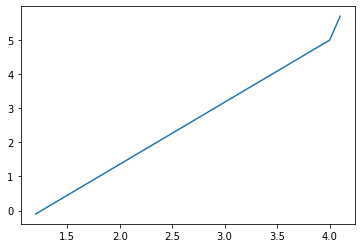

In [118]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(X, Y)
plt.show()

#### I.2. Écriture d'un fichier `.csv`

**I.2.a.** Méthode utile `.join()`, `.replace()`

**I.2.b.** Mise en œuvre pratique